In [1]:
import ee, geemap, geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import os
os.getcwd()
os.chdir("G:/OneDrive/casa0010dissertation/00_06 jaipur code_mgwr")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import geopandas as gpd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from time import time
import sys

In [14]:

# Basic plotting settings for matplotlib and seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

import contextily as cx
from matplotlib.colors import Normalize

# Pandas display settings
pd.set_option('display.max_columns', None)

# Matplotlib basic settings
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

# Grid settings
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.axisbelow'] = True

# Spine/border settings
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.edgecolor'] = 'gray'

# Matplotlib figure DPI setting
mpl.rcParams['figure.dpi'] = 300


sns.set_style("whitegrid", {
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.top": True,
    "axes.spines.right": True,
    "axes.linewidth": 0.5,
    "axes.edgecolor": "gray",
    "grid.color": "gray",
    "grid.alpha": 0.3,
    "axes.facecolor": "white"
})

sns.set_context(context="paper", font_scale=1.5, rc=None)
sns.set(font="serif")

# Additional libraries for geo-spatial analysis (if needed)
import geopandas as gpd
import contextily as cx
from matplotlib.colors import Normalize

In [6]:
ee.Authenticate()

True

In [7]:
ee.Initialize()

In [8]:
gdf = gpd.read_file('data/cleaned/grid_pop_mgwr04.geojson')
bound = gpd.read_file("data/raw/JMC_union.geojson").to_crs(epsg=4326)
roi = geemap.geopandas_to_ee(bound)

In [11]:
# load GHS-POP 2020
image = ee.Image('JRC/GHSL/P2023A/GHS_POP/2020').updateMask(ee.Image('JRC/GHSL/P2023A/GHS_POP/2020').gt(0)).clip(roi)

band = 'population_count'

stats = image.reduceRegion(
    reducer=ee.Reducer.minMax().combine(ee.Reducer.mean(), '', True),
    geometry=roi,
    scale=100,
    bestEffort=True
).getInfo()

print("pop in pixel：")
print(f"min: {stats[f'{band}_min']:.2f}")
print(f"max: {stats[f'{band}_max']:.2f}")
print(f"mean: {stats[f'{band}_mean']:.2f}")

pop in pixel：
min: 0.01
max: 950.62
mean: 111.59


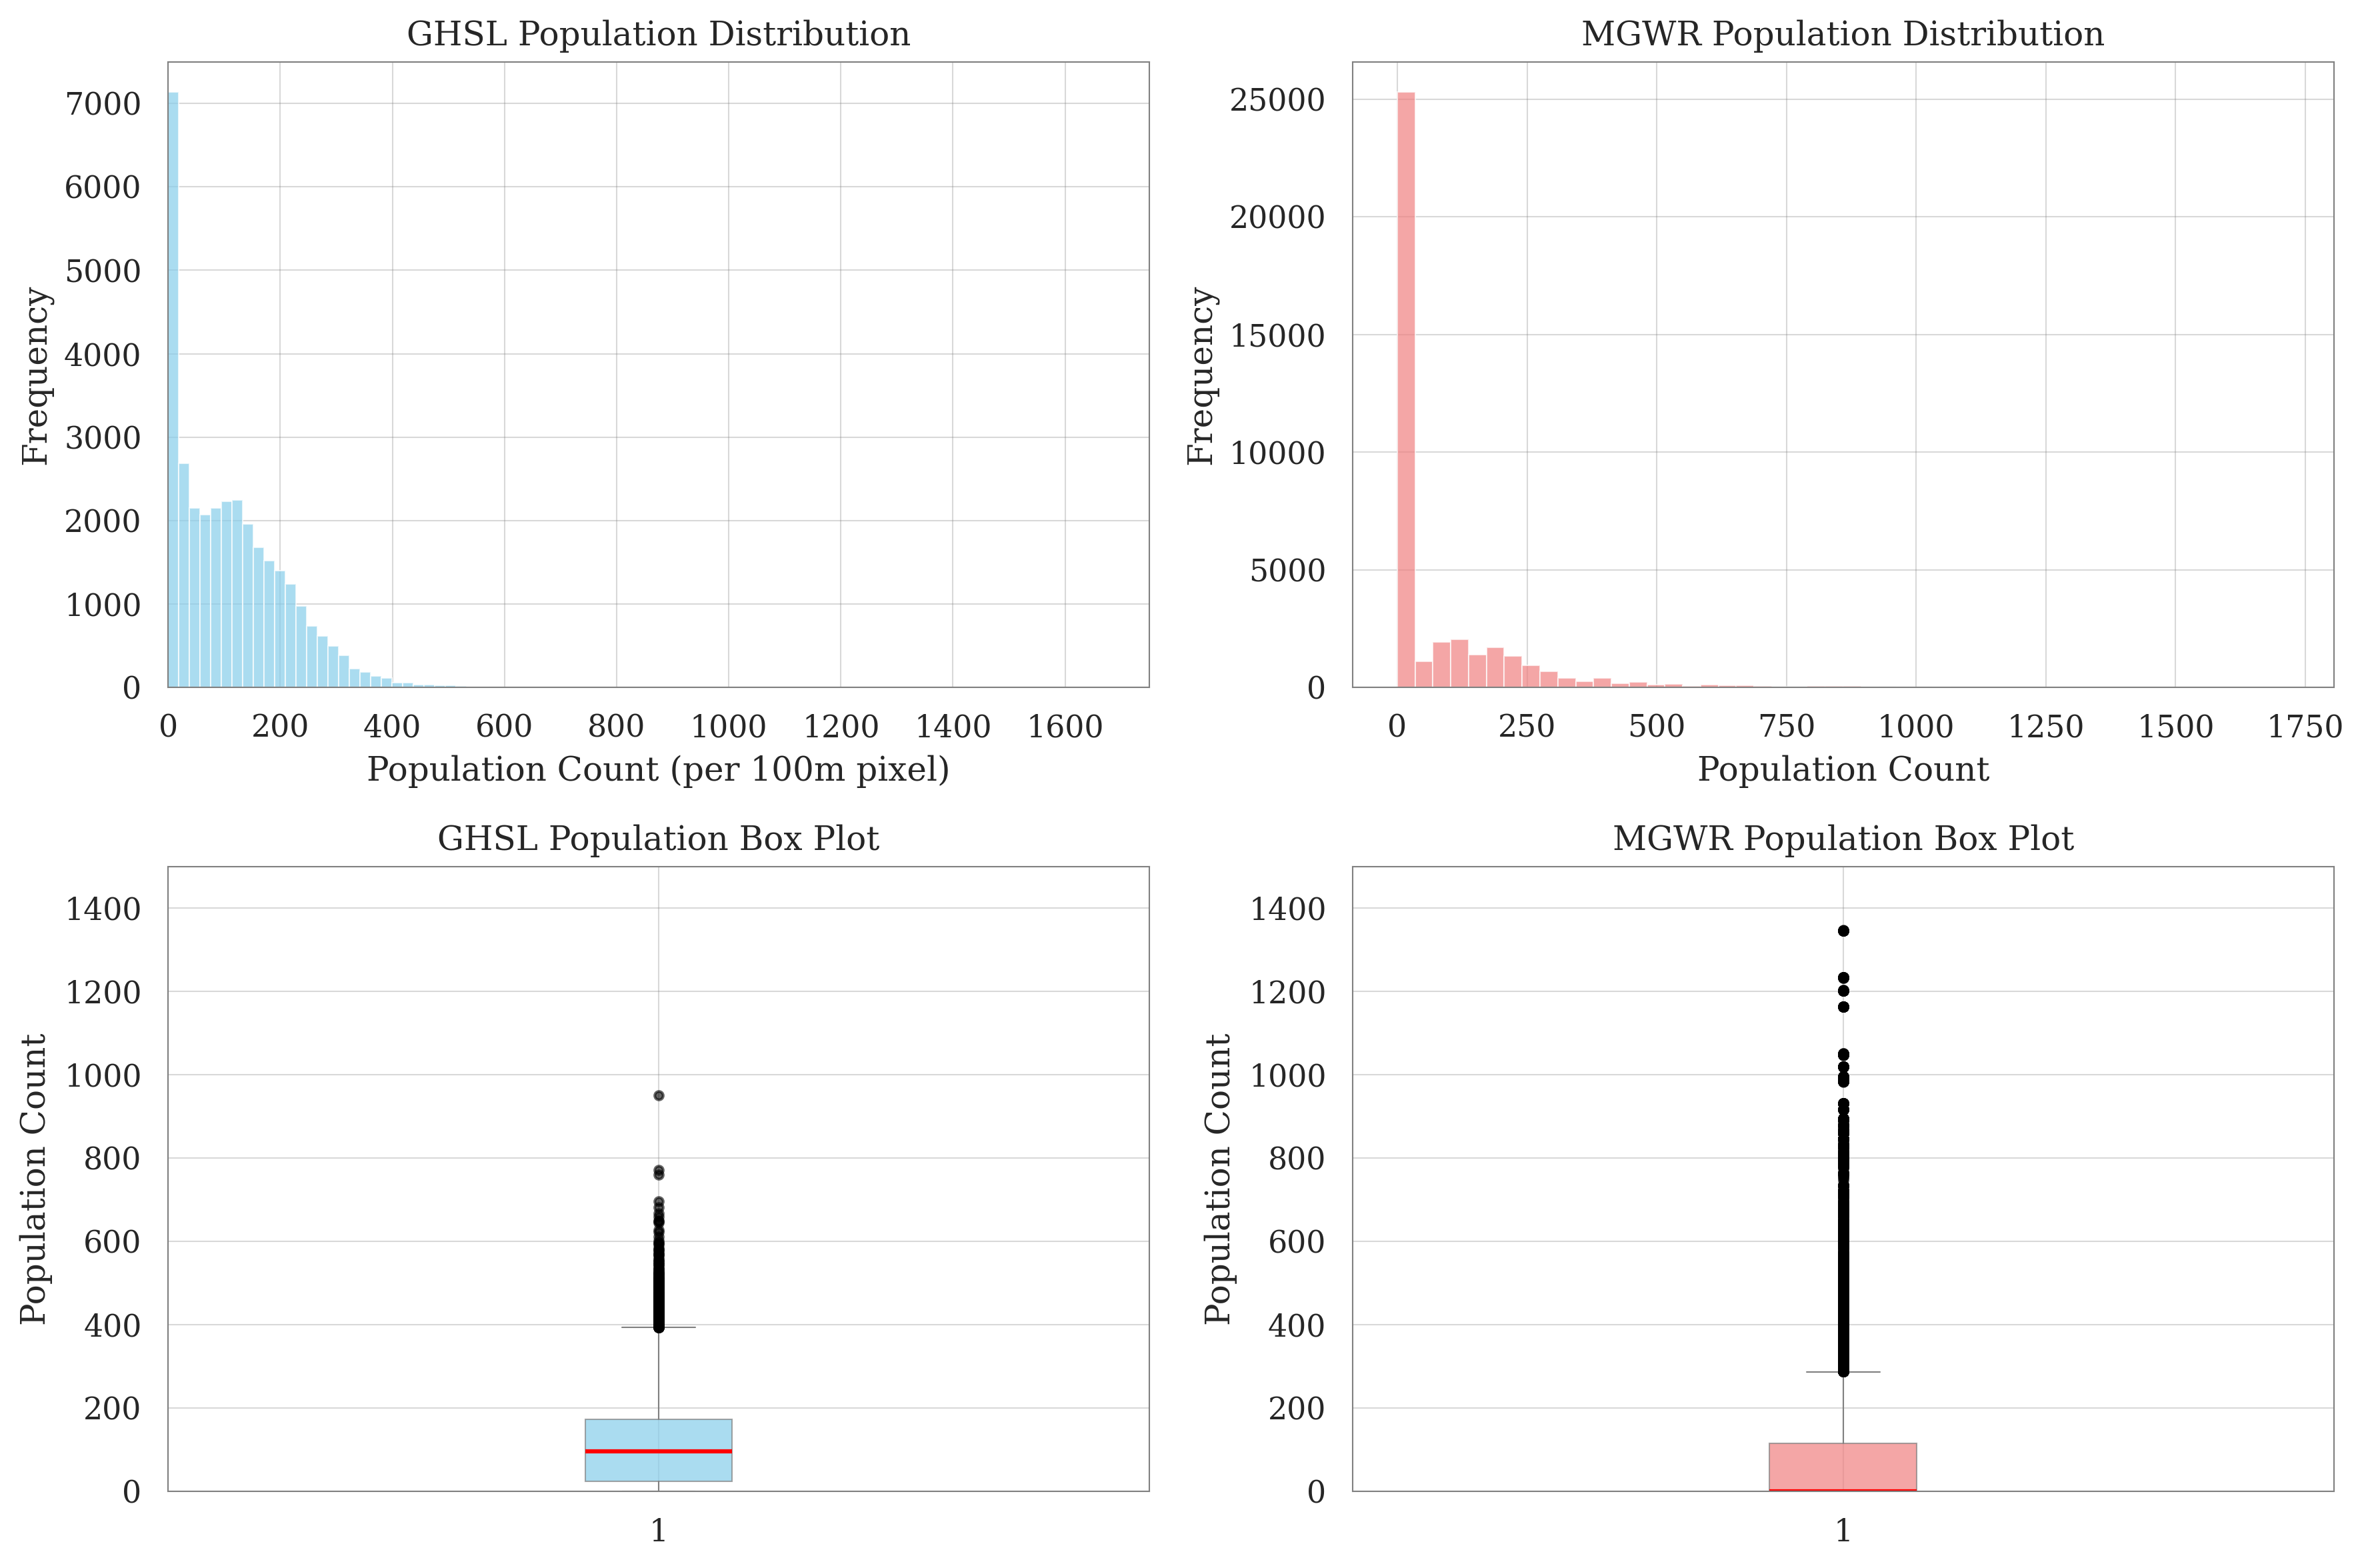

In [18]:

import matplotlib.pyplot as plt
import numpy as np

# Keep the data acquisition code unchanged
histogram = image.reduceRegion(
    reducer=ee.Reducer.histogram(maxBuckets=1000),
    geometry=roi,
    scale=100,
    bestEffort=True
).getInfo()

hist = histogram['population_count']
values = hist['bucketMeans']
counts = hist['histogram']

ghsl_pop = np.repeat(values, counts)
mgwr_pop = gdf['pop_int'].values

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Set overall background color
fig.patch.set_facecolor('white')

# Define function to apply consistent style
def apply_style(ax):
    """Apply border and grid styling"""
    # Set background color
    ax.set_facecolor('white')

    # Set grid - ensure grid is behind the plot
    ax.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)

    # Set all borders visible and style them
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('gray')
        spine.set_linewidth(0.5)

# GHSL histogram - extend x-axis to 1750 for better comparability
apply_style(axes[0, 0])
axes[0, 0].hist(ghsl_pop, bins=50, alpha=0.7, color='skyblue',
                edgecolor='white', linewidth=0.5)
axes[0, 0].set_xlabel('Population Count (per 100m pixel)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('GHSL Population Distribution')
axes[0, 0].set_xlim(0, 1750)  # Set x-axis limit for better comparison

# MGWR histogram
apply_style(axes[0, 1])
axes[0, 1].hist(mgwr_pop, bins=50, alpha=0.7, color='lightcoral',
                edgecolor='white', linewidth=0.5)
axes[0, 1].set_xlabel('Population Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('MGWR Population Distribution')

# GHSL box plot - set y-axis to 1750 for comparability
apply_style(axes[1, 0])
box1 = axes[1, 0].boxplot(ghsl_pop, patch_artist=True,
                          boxprops=dict(facecolor='skyblue', alpha=0.7,
                                      edgecolor='gray', linewidth=0.5),
                          medianprops=dict(color='red', linewidth=1.5),
                          whiskerprops=dict(color='gray', linewidth=0.5),
                          capprops=dict(color='gray', linewidth=0.5),
                          flierprops=dict(marker='o', markerfacecolor='black',
                                        markersize=3, alpha=0.6))
axes[1, 0].set_ylabel('Population Count')
axes[1, 0].set_title('GHSL Population Box Plot')
axes[1, 0].set_ylim(0, 1500)  # Set y-axis limit for comparison

# MGWR box plot - set y-axis to 1750 for comparability
apply_style(axes[1, 1])
box2 = axes[1, 1].boxplot(mgwr_pop, patch_artist=True,
                          boxprops=dict(facecolor='lightcoral', alpha=0.7,
                                      edgecolor='gray', linewidth=0.5),
                          medianprops=dict(color='red', linewidth=1.5),
                          whiskerprops=dict(color='gray', linewidth=0.5),
                          capprops=dict(color='gray', linewidth=0.5),
                          flierprops=dict(marker='o', markerfacecolor='black',
                                        markersize=3, alpha=0.6))
axes[1, 1].set_ylabel('Population Count')
axes[1, 1].set_title('MGWR Population Box Plot')
axes[1, 1].set_ylim(0, 1500)  # Set y-axis limit for comparison

plt.tight_layout()

# Optional: save figure
# plt.savefig('population_distribution_comparison.png', dpi=300,
#             bbox_inches='tight', facecolor='white')

plt.show()

In [9]:
print("GHSL Population Statistics:")
print(f"Count: {len(ghsl_pop):,} pixels")
print(f"Mean: {np.mean(ghsl_pop):.2f}")
print(f"Median: {np.median(ghsl_pop):.2f}")
print(f"Std: {np.std(ghsl_pop):.2f}")

print("\nMGWR Population Statistics:")
print(f"Count: {len(mgwr_pop):,} areas")
print(f"Mean: {np.mean(mgwr_pop):.2f}")
print(f"Median: {np.median(mgwr_pop):.2f}")
print(f"Std: {np.std(mgwr_pop):.2f}")

GHSL Population Statistics:
Count: 32,608 pixels
Mean: 111.62
Median: 95.43
Std: 97.02

MGWR Population Statistics:
Count: 38,906 areas
Mean: 78.49
Median: 0.00
Std: 151.03


In [8]:
# populationCountVis = {
#     'min': 0.0,
#     'max': 100.0,
#     'palette': ['000004', '320A5A', '781B6C', 'BB3654', 'EC6824', 'FBB41A', 'FCFFA4']
# }
# Map = geemap.Map()
# Map.addLayer(image, populationCountVis, 'Population count, 2020');
# Map.set_center(75.7873, 26.9124, 10)
# Map